# Non-Negative Matric Factorization

Let's repeat the topic modeling task from the previous lecture, but this time, we will use NMF instead of LDA.
https://www.kaggle.com/akashram/topic-modeling-intro-implementation

## Step 1: loading data

We will be using articles scraped from NPR (National Public Radio), obtained from their website [www.npr.org](http://www.npr.org)

In [1]:
# Importing modules
import pandas as pd
import os

import json 

In [2]:
# os.chdir('..')

cwd = os.getcwd()
print(cwd)

/home/christopheschellinck/Documents/Projects/project_NLP_humain/testing_files


In [3]:
with open("../news_data.json", "r") as f:
    papers10 = json.load(f)

In [4]:
from pandas.io.json import json_normalize

In [5]:
papers = pd.json_normalize(papers10["data"])

In [6]:
papers.head()

,id,title,summary,authors,tags,text,url,source,created_at,updated_at,author,date
0,10813,"ZingBox aims for ‘Internet of Trusted Things’,...",Cybersecurity provider ZingBox has announced t...,None,device\niot\nguardian\napproach\ndevices\nindu...,Cybersecurity provider ZingBox has announced t...,https://artificialintelligence-news.com/2017/0...,AInews,2020-02-05T17:08:34.343Z,2020-02-05T17:08:34.343Z,James Bourne,2017-04-25
1,10814,AI may help create more sustainable data centres,Enterprise data centre provider Aegis Data arg...,None,data\ncentre\nnatural\nnew\ntechnology\nindust...,Enterprise data centre provider Aegis Data arg...,https://artificialintelligence-news.com/2017/0...,AInews,2020-02-05T17:08:34.355Z,2020-02-05T17:08:34.355Z,James Bourne,2017-04-25
2,10815,Why a potential trillion dollar B2B bots indus...,"From Domino’s Pizza, to Uber, to Bank of Ameri...",None,next\nbig\ngupshup\none\nbusiness\ntech\nimpac...,"From Domino’s Pizza, to Uber, to Bank of Ameri...",https://artificialintelligence-news.com/2017/0...,AInews,2020-02-05T17:08:34.365Z,2020-02-05T17:08:34.365Z,James Bourne,2017-04-25
3,10816,Why companies investing in AI today should exp...,Organisations investing in artificial intellig...,None,ai\norganisations\nindustry\nemployees\nexpo\n...,Organisations investing in artificial intellig...,https://artificialintelligence-news.com/2017/0...,AInews,2020-02-05T17:08:34.375Z,2020-02-05T17:08:34.375Z,James Bourne,2017-04-25
4,10817,Tencent gears up for greater GPU acceleration ...,Tencent’s cloud computing services will be bee...,None,gpu\naccelerators\ngpus\ncloud\nservices\ntesl...,Tencent’s cloud computing services will be bee...,https://artificialintelligence-news.com/2017/0...,AInews,2020-02-05T17:08:34.385Z,2020-02-05T17:08:34.385Z,James Bourne,2017-04-26


In [7]:
papers.columns

Index(['id', 'title', 'summary', 'authors', 'tags', 'text', 'url', 'source',
       'created_at', 'updated_at', 'author', 'date'],
      dtype='object')

In [8]:
papers.shape

(1626, 12)

In [9]:
papers.sample(1).text

1199    Your ship crash-lands on an alien world. To ge...
Name: text, dtype: object

Notice how we don't have the topic of the articles! Let's use LDA to attempt to figure out clusters of the articles.

## Step 2: Data cleaning

In [10]:
papers1 = papers

In [11]:
# Remove the columns
papers2 = papers1.drop(columns=['authors', 'url', 'source', 'created_at', 'updated_at', 'author', 'date'], axis=1, inplace = False)

# Print out the first rows of papers
papers2.head()


,id,title,summary,tags,text
0,10813,"ZingBox aims for ‘Internet of Trusted Things’,...",Cybersecurity provider ZingBox has announced t...,device\niot\nguardian\napproach\ndevices\nindu...,Cybersecurity provider ZingBox has announced t...
1,10814,AI may help create more sustainable data centres,Enterprise data centre provider Aegis Data arg...,data\ncentre\nnatural\nnew\ntechnology\nindust...,Enterprise data centre provider Aegis Data arg...
2,10815,Why a potential trillion dollar B2B bots indus...,"From Domino’s Pizza, to Uber, to Bank of Ameri...",next\nbig\ngupshup\none\nbusiness\ntech\nimpac...,"From Domino’s Pizza, to Uber, to Bank of Ameri..."
3,10816,Why companies investing in AI today should exp...,Organisations investing in artificial intellig...,ai\norganisations\nindustry\nemployees\nexpo\n...,Organisations investing in artificial intellig...
4,10817,Tencent gears up for greater GPU acceleration ...,Tencent’s cloud computing services will be bee...,gpu\naccelerators\ngpus\ncloud\nservices\ntesl...,Tencent’s cloud computing services will be bee...


In [12]:
papers2.shape

(1626, 5)

### Applying regex

In [13]:
# Load the regular expression library
import re

# Remove punctuation
papers2['text_preprocessed'] = \
papers2['text'].map(lambda x: re.sub('\s+', ' ', x))

papers2['text_preprocessed'] = \
papers2['text_preprocessed'].map(lambda x: re.sub('[\n]', ' ', x))

papers2['text_preprocessed'] = \
papers2['text_preprocessed'].map(lambda x: re.sub('[\']', '', x))

papers2['text_preprocessed'] = \
papers2['text_preprocessed'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers2['text_preprocessed'] = \
papers2['text_preprocessed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers2['text_preprocessed'].head()

0    cybersecurity provider zingbox has announced t...
1    enterprise data centre provider aegis data arg...
2    from domino’s pizza to uber to bank of america...
3    organisations investing in artificial intellig...
4    tencent’s cloud computing services will be bee...
Name: text_preprocessed, dtype: object

### Applying lemmatization

In [14]:
# Perform standard imports:
import spacy


### spaCy preparation for lemmatization

In [15]:
nlp_en_core_web_sm = spacy.load('en_core_web_sm')

In [16]:
def lemmatizing_article(line):
    
    string = ''
    list1 = []
    doc = nlp_en_core_web_sm(line)
    for token in doc:
        #string = ''.join(token.lemma_)
        list1.append(token.lemma_)
    
    return list1

In [17]:
papers2['text_lemmatized'] = \
papers2['text_preprocessed'].apply(lambda x: lemmatizing_article(x))

In [18]:
print(papers2.head(20))

       id                                              title  \
0   10813  ZingBox aims for ‘Internet of Trusted Things’,...   
1   10814   AI may help create more sustainable data centres   
2   10815  Why a potential trillion dollar B2B bots indus...   
3   10816  Why companies investing in AI today should exp...   
4   10817  Tencent gears up for greater GPU acceleration ...   
5   10818  Bonsai launches Early Access Program to help e...   
6   10819  AI falls on the final furlong in predicting Ke...   
7   10820  Most Britons want AI to support at least part ...   
8   10821  Medicine, law and IT may be affected by the ri...   
9   10822  Cisco acquires AI firm MindMeld to create more...   
10  10823  University of Cambridge bolsters AI research e...   
11  10824  Cray launches two new CS-Storm accelerated clu...   
12  10825  UNICEF joins Apple, Google, Facebook et al in ...   
13  10826  New intelligent street light software aims to ...   
14  10827  Cylance launches first claime

In [19]:
# Function to convert each line of a dataset column from list to string
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [20]:
papers2['text_lemmatized_string'] = \
papers2['text_lemmatized'].apply(lambda x: listToString(x))

In [21]:
print(papers2.head(20))

       id                                              title  \
0   10813  ZingBox aims for ‘Internet of Trusted Things’,...   
1   10814   AI may help create more sustainable data centres   
2   10815  Why a potential trillion dollar B2B bots indus...   
3   10816  Why companies investing in AI today should exp...   
4   10817  Tencent gears up for greater GPU acceleration ...   
5   10818  Bonsai launches Early Access Program to help e...   
6   10819  AI falls on the final furlong in predicting Ke...   
7   10820  Most Britons want AI to support at least part ...   
8   10821  Medicine, law and IT may be affected by the ri...   
9   10822  Cisco acquires AI firm MindMeld to create more...   
10  10823  University of Cambridge bolsters AI research e...   
11  10824  Cray launches two new CS-Storm accelerated clu...   
12  10825  UNICEF joins Apple, Google, Facebook et al in ...   
13  10826  New intelligent street light software aims to ...   
14  10827  Cylance launches first claime

### spaCy preparation for removing stopwords (automatic removed by spaCy as well as the manual selection of stopwords)

In [22]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

In [23]:
# STOP WORD set in order to add manually stopwords to the stop word list
STOP_WORDS |= {"ai", "artificial", "intelligence"}

In [24]:
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

In [25]:
def removing_stopwords(line):
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(line)

    # Create list of word tokens
    token_list = []
    
    for token in my_doc:
        token_list.append(token.text)


    # Create list of word tokens after removing stopwords
    filtered_sentence =[] 

    for word in token_list: 

        lexeme = nlp.vocab[word]
   
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
            
            
    return filtered_sentence
    
    
    

In [26]:
papers2['text_cleaned'] = \
papers2['text_lemmatized_string'].apply(lambda x: removing_stopwords(x))

In [27]:
print(papers2['text_cleaned'].head(10))

0    [cybersecurity, provider, zingbox, announce, l...
1    [enterprise, data, centre, provider, aegis, da...
2    [domino, pizza, uber, bank, america, bots, hot...
3    [organisation, invest, (, ), anticipate, 39, %...
4    [tencent, cloud, computing, service, beef, gpu...
5    [-PRON-, -, base, bonsai, set, engage, enterpr...
6    [kentucky, derby, race, triple, crown, horse, ...
7    [new, survey, commission, uc, expo, event, rev...
8    [gartner, tentative, guideline, 2022, smart, m...
9    [cisco, announce, -PRON-, intent, acquire, min...
Name: text_cleaned, dtype: object


In [28]:
papers2['text_cleaned_string'] = \
papers2['text_cleaned'].apply(lambda x: listToString(x))

In [29]:
print(papers2['text_cleaned_string'].head(20))

0     cybersecurity provider zingbox announce launch...
1     enterprise data centre provider aegis data arg...
2     domino pizza uber bank america bots hot proper...
3     organisation invest ( ) anticipate 39 % revenu...
4     tencent cloud computing service beef gpu accel...
5     -PRON- - base bonsai set engage enterprise ind...
6     kentucky derby race triple crown horse racing ...
7     new survey commission uc expo event reveal 85 ...
8     gartner tentative guideline 2022 smart machine...
9     cisco announce -PRON- intent acquire mindmeld ...
10    leverhulme centre future ( cfi ) join - - prof...
11    cray launch new cs - storm accelerate cluster ...
12    unicef announce -PRON- join partnership ( ) da...
13    tcs digital software & solutions group tata co...
14    australia - base cylance announce general avai...
15    peopleai receive $ 7 million series funding le...
16    ( ) deep learning help analyse image patient o...
17    san francisco - base crowdsource firm crow

In [ ]:
## Manual NMF model building

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [167]:
texts = papers2['text_cleaned']

In [86]:
#tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [169]:
#texts = df['processed_text']
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)
tfidf = tfidf_vectorizer.fit_transform(texts)

In [170]:
nmf = NMF(
    n_components=20,
    init='nndsvd'
).fit(tfidf)

In [171]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [165]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# A = tfidf ???

In [177]:
# A = tfidf.transform(texts)
# A = tfidf.transform(texts)
# TfidfVectorizer
W = nmf.components_
H = nmf.transform(tfidf)

In [180]:
print(W)
print('\n\n')
print(H)

[[0.04118416 0.00579343 0.00232928 ... 0.         0.         0.        ]
 [0.01358988 0.00101442 0.         ... 0.         0.         0.        ]
 [0.02021046 0.         0.         ... 0.00360446 0.00090056 0.        ]
 ...
 [0.01114519 0.         0.0039828  ... 0.         0.         0.        ]
 [0.00720762 0.0026766  0.00216779 ... 0.         0.         0.07397321]
 [0.10404521 0.         0.         ... 0.         0.         0.        ]]



[[0.         0.15162563 0.00145817 ... 0.         0.         0.0177025 ]
 [0.         0.11590902 0.00552744 ... 0.         0.         0.00976268]
 [0.00811671 0.14361121 0.         ... 0.03618125 0.         0.        ]
 ...
 [0.         0.         0.11502178 ... 0.00346943 0.0051476  0.        ]
 [0.00753673 0.         0.25144168 ... 0.         0.         0.00677234]
 [0.01830016 0.00554809 0.         ... 0.01489946 0.01772062 0.00642855]]


In [134]:
def count_words(text):
    
    counter = 0
    for i in text:
        counter += 1
        
    return counter

In [147]:
papers2['word_count'] = papers2['text_cleaned'].apply(lambda x: count_words(x))

In [148]:
print(papers2)

         id                                              title  \
0     10813  ZingBox aims for ‘Internet of Trusted Things’,...   
1     10814   AI may help create more sustainable data centres   
2     10815  Why a potential trillion dollar B2B bots indus...   
3     10816  Why companies investing in AI today should exp...   
4     10817  Tencent gears up for greater GPU acceleration ...   
...     ...                                                ...   
1621  12434    Robotic pets may be bad medicine for melancholy   
1622  12435          MIT develops Anklebot for stroke patients   
1623  12436                                 Notes from the Lab   
1624  12437        Ray and Maria Stata give $25 million to MIT   
1625  12438  Reuters Uses AI To Prototype First Ever Automa...   

                                                summary  \
0     Cybersecurity provider ZingBox has announced t...   
1     Enterprise data centre provider Aegis Data arg...   
2     From Domino’s Pizza, to 

In [149]:
# Descriptive statistics for word count
papers2['word_count'].describe()

count    1626.000000
mean      461.149446
std       269.573823
min        51.000000
25%       287.000000
50%       404.000000
75%       559.750000
max      3126.000000
Name: word_count, dtype: float64

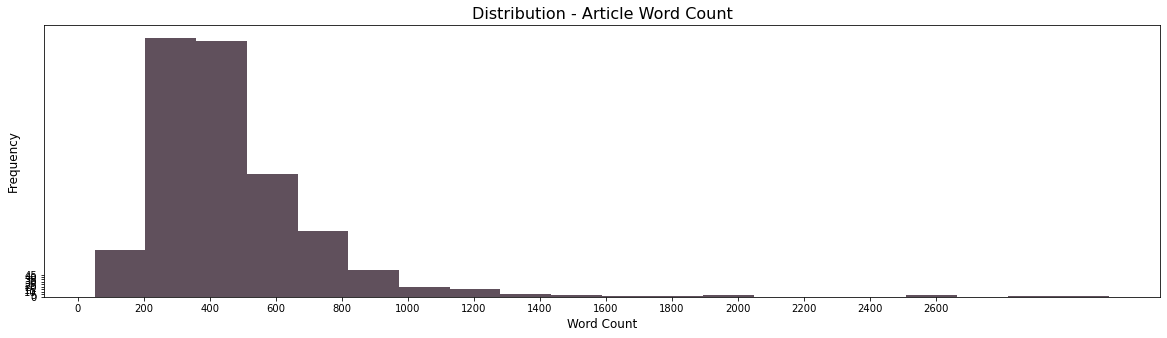

In [150]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(20,5))

plt.hist(
    papers2['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 2700, 200))

file_name = 'hist'

plt.show()

/home/christopheschellinck/anaconda3/envs/virtualenvchris/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/christopheschellinck/anaconda3/envs/virtualenvchris/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


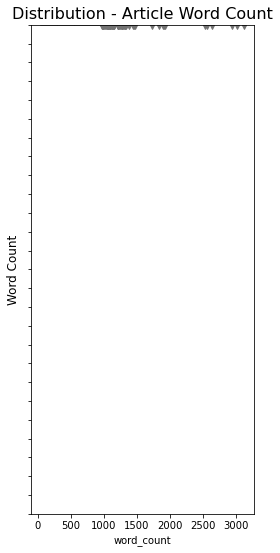

In [151]:
# Plot a boxplot of the word counts
fig = plt.figure(figsize=(4,9))

sns.boxplot(
    papers2['word_count'],
    orient='v',
    width=.5,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Article Word Count', fontsize=16)
plt.yticks(np.arange(0, 2700, 100))

file_name = 'box_plot'


plt.show()

In [152]:
# Get the top 20 most common words among all the articles
p_text = papers2['text_cleaned']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,-PRON-,52030
1,"""",23081
2,-,13863
3,use,5662
4,—,5052
5,’,4124
6,like,3819
7,system,3803
8,datum,3673
9,machine,3666


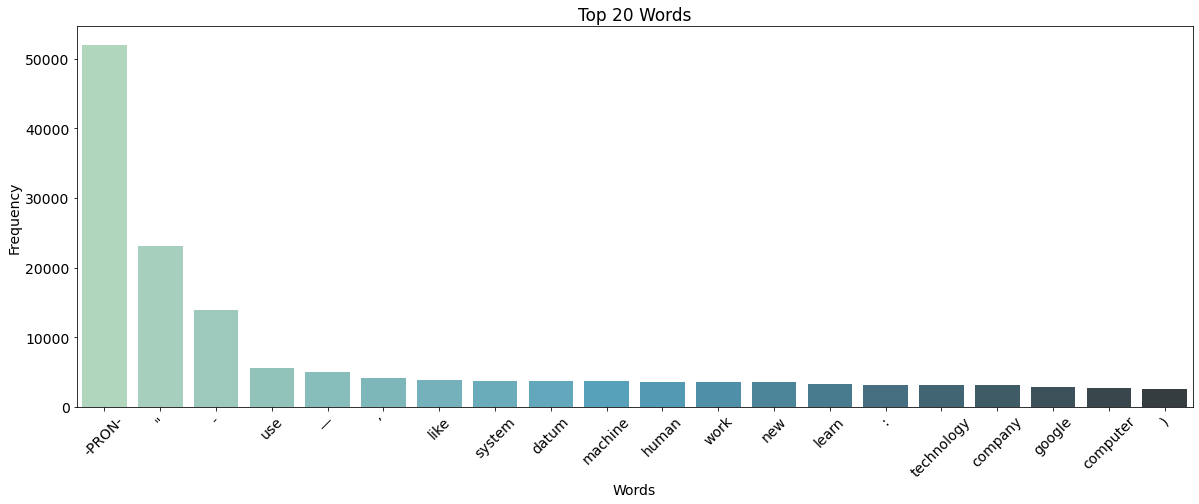

In [154]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

file_name = 'top_words'

plt.show()

## gensim way making reference score

In [ ]:
# https://github.com/robsalgado/personal_data_science_projects/blob/master/topic_modeling_nmf/topic_modeling_cnn.ipynb

# https://towardsdatascience.com/topic-modeling-articles-with-nmf-8c6b2a227a45

In [93]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

from collections import Counter
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [128]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = papers2['text_cleaned']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]
starting_from = 3
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(starting_from, 30 + 1, 1))
#topic_nums = range(20)

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []



for num in topic_nums:
    #nmf = Nmf(common_corpus, num_topics=50, kappa=0.1, eval_every=5)
    # nmf = Nmf(corpus=corpus, num_topics=topic_nums, kappa=0.1, eval_every=5)
    # nmf = Nmf(corpus=corpus, num_topics=num, kappa=0.1, eval_every=5)
    
    nmf = Nmf(
        corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    #nmf = Nmf(corpus=corpus, num_topics=num)
    print(num)
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]
print('\n')
print('Optimal number of topics: ')
print(best_num_topics)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


Optimal number of topics: 
6


In [129]:
print(coherence_scores)

[0.29122, 0.33645, 0.34928, 0.4285, 0.42253, 0.38947, 0.40445, 0.41512, 0.42056, 0.39475, 0.41606, 0.42703, 0.40773, 0.41815, 0.39833, 0.40237, 0.39645, 0.41175, 0.41152, 0.42466, 0.39965, 0.41328, 0.40462, 0.42037, 0.40582, 0.41115, 0.4045, 0.39091]


In [130]:
for index, value in enumerate(coherence_scores, starting_from):
    print(index, value)

3 0.29122
4 0.33645
5 0.34928
6 0.4285
7 0.42253
8 0.38947
9 0.40445
10 0.41512
11 0.42056
12 0.39475
13 0.41606
14 0.42703
15 0.40773
16 0.41815
17 0.39833
18 0.40237
19 0.39645
20 0.41175
21 0.41152
22 0.42466
23 0.39965
24 0.41328
25 0.40462
26 0.42037
27 0.40582
28 0.41115
29 0.4045
30 0.39091


In [131]:
# print(coherence_scores.argmax(array, axis = 1))
print('Highest coherence score of the trials: %s' % max(coherence_scores))
print('index of the highest value (considering the sequential order of the values of the scores): %s' % np.argmax(coherence_scores))


Highest coherence score of the trials: 0.4285
index of the highest value (considering the sequential order of the values of the scores): 3


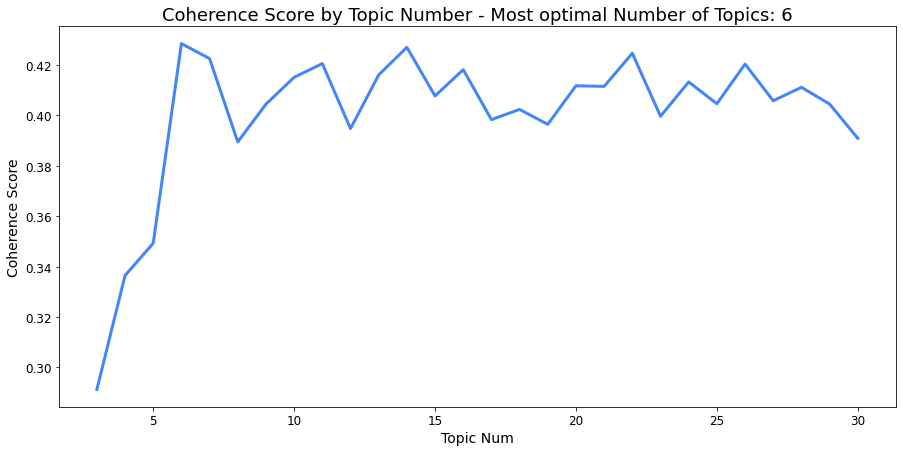

In [132]:
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Most optimal Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)


# file_name = 'c_score'

# fig.savefig(
#    file_path + file_name + '.png',
#    dpi=fig.dpi,
#    bbox_inches='tight'
# )

plt.show()

In [181]:
# A = tfidf ???

In [ ]:
"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd
import clr
#PLOTTING TOOLS 
# import matplotlib.pyplot as PLOTTING
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

dataset = pd.read_json('out.json', lines = True)
documents = dataset['attachment']

no_features = 1000
no_topics = 9
# print ('Old number of topics: ', no_topics)
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, max_features = no_features, stop_words = 'english', norm='l2')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

no_topics = tfidf.shape
retrain_value = no_topics[0]
# print('New number of topics :', retrain_value)

nmf = NMF(n_components = retrain_value, random_state = 1, alpha = .1, l1_ratio = .5, init = 'nndsvd').fit(tfidf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d: " % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words -1:-1]]))

no_top_words = 20
display_topics(nmf, tfidf_feature_names, no_top_words)
"""

In [186]:
kmin, kmax = 2, 10

topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    #model = decomposition.NMF( init="nndsvd", n_components=k )
    model = NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform(tfidf)
    # W = model.fit_transform(A)
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok.lower() in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok.lower() )
            yield tokens

docs_raw = texts
#stop_words = {stopwords}
# docgen = okenGenerator(docs_raw, stop_words)(docs_raw, stop_words)
docgen = TokenGenerator(docs_raw, stop_words)
w2v_model = gensim.models.Word2Vec(docgen, size=500, min_count=20, sg=1)

def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            #print(str(pair[0]) + " " + str(pair[1]))
            pair_scores.append( w2v_model.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

%matplotlib inline
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

Applying NMF for k=2 ...
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


NameError: name 'stopwords' is not defined

## Step 3: Splitting the articles with a training part and a test part 
### Is to be doen now because after tfidf application not possible anymore to add the colum "topic"

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
articles_train, articles_test = train_test_split(papers2, test_size = 0.25)
    

## Step 4: Preprocessing with TfidfVectorizer and fit_transform on the training data

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [42]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

## Step 4.b:  Applying fit_transform on the training data by TfidfVectorizer 

In [43]:
# dtm_train = tfidf.fit_transform(articles_train['text_cleaned_string'])
dtm_train = tfidf.fit_transform(articles_train['text_cleaned_string'])
# dtm_train = tfidf.fit_transform(articles_train['text_preprocessed'])


In [44]:
dtm_train

<1219x12426 sparse matrix of type '<class 'numpy.float64'>'
	with 283438 stored elements in Compressed Sparse Row format>

In [45]:
dtm_train.shape

(1219, 12426)

<h1> <p style="color:purple">Step 5: NMF making the model with the training part of the data (THIS IS THE MODEL) </h1></p>

## Step 5.a: Making the model

In [46]:
from sklearn.decomposition import NMF

In [47]:
nmf_model = NMF(n_components=20,random_state=42)

In [48]:
### fit based on the train data

In [49]:
# This can take awhile, we're dealing with a large amount of documents!
nmf_model.fit(dtm_train)

NMF(n_components=20, random_state=42)

In [156]:
kmin, kmax = 2, 30

topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform(papers2['text_cleaned_string'])
    # W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok.lower() in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok.lower() )
            yield tokens

docgen = TokenGenerator(docs_raw, stop_words)
w2v_model = gensim.models.Word2Vec(docgen, size=500, min_count=20, sg=1)

def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            #print(str(pair[0]) + " " + str(pair[1]))
            pair_scores.append( w2v_model.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

%matplotlib inline
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

Applying NMF for k=2 ...


ValueError: could not convert string to float: 'cybersecurity provider zingbox announce launch new generation cybersecurity solution iot guardian focus service protection solution claim industry offer combination deep learning algorithm discern device unique personality enforce acceptable behaviour -PRON- self - learn approach continually build previous knowledge discover detect defend critical internet thing ( iot ) service datum avoid false positive 999 % accuracy iot guardian work differently traditional -PRON- security solution outmode -PRON- security focus datum protection unable defend diverse set iot device feature variety non - standard customised operating system new iot guardian hand develop fully non - disruptive approach discern device personality monitor activity enforce trust behaviour new device - personality approach conceptualise stanford university zingbox founder address zero - day cyber insider threat eliminate need instal software agent device jerry marshall director information service telecommunication united regional health care system : " medical device network hospital rigorously monitor -PRON- need solution generate real - time inventory medical device hospital network evaluate risk exposure zingbox solution discover 95 % medical device compare current tool detect 5 % accuracy elaborate device personality allow -PRON- turn zingbox tool regulate medical device behaviour " interested hear industry leader discuss subject like share -PRON- use - case attend co - locate & big datum expo event upcoming silicon valley london amsterdam learn co - locate iot tech expo blockchain expo cyber security & cloud expo -PRON- explore future enterprise technology place'

## Step 5.b: Saving the model

In [ ]:
import pickle

In [ ]:
# Save to file in the current working directory
pkl_filename = "pickle_model_NLP.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(nmf_model, file)

## Step 5.c: Displaying Topics

In [ ]:
len(tfidf.get_feature_names())

In [ ]:
import random

In [ ]:
for i in range(10):
    random_word_id = random.randint(0, len(tfidf.get_feature_names()))
    print(tfidf.get_feature_names()[random_word_id])

In [ ]:
for i in range(10):
    random_word_id = random.randint(0, len(tfidf.get_feature_names()))
    print(tfidf.get_feature_names()[random_word_id])

In [ ]:
len(nmf_model.components_)

In [ ]:
nmf_model.components_

In [ ]:
len(nmf_model.components_[0])

In [ ]:
single_topic = nmf_model.components_[0]

In [ ]:
# Returns the indices that would sort this array.
single_topic.argsort()

In [ ]:
# Word least representative of this topic
single_topic[0]

In [ ]:
# Word most representative of this topic
single_topic[4197]

In [ ]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

In [ ]:
top_word_indices = single_topic.argsort()[-10:]

In [ ]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

These look like business articles perhaps... Let's confirm by using .transform() on our vectorized articles to attach a label number. But first, let's view all the 10 topics found.

In [ ]:
print(nmf_model.components_)

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print([topic[i] for i in topic.argsort()[-15:]])
    print('\n')

In [ ]:
dfs = []
for index,topic in enumerate(nmf_model.components_):
#    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    names = [tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]]
    weight = [topic[i] for i in topic.argsort()[-15:]]
    d = {'Names' : names, 'Weight' : weight}
    df = pd.DataFrame(d)
    df = df.sort_values(by='Weight', ascending=False)
    dfs.append(df)


In [ ]:
dfs[0].head(5)

# Attaching Discovered Topic Labels to Original Articles

In [ ]:
articles_train.shape

In [ ]:
articles_test.shape

### transform based on the train data

In [ ]:
topic_results_train = nmf_model.transform(dtm_train)

In [ ]:
topic_results_train.shape

In [ ]:
topic_results_train[0]

In [ ]:
topic_results_train[0].round(2)

In [ ]:
topic_results_train[0].argmax()

This means that our model thinks that the first article belongs to topic #1.

### Combining with Original Data

In [ ]:
papers2.head()

In [ ]:
papers2.tail()

In [ ]:
topic_results_train.argmax(axis=1)

In [ ]:
articles_train['Topic'] = topic_results_train.argmax(axis=1)

In [ ]:
print(articles_train)

## <p style="color:purple">Step 6: Using the trained model to define the topics on an imported PDF-file </p>

# Step X: topic results with the PDF-file

## Step X.a:  Importing PDF file

In [ ]:
# note the capitalization
import PyPDF2

from PyPDF2 import PdfFileReader

import os
# import str

In [ ]:
os.chdir('../reports')

cwd = os.getcwd()
print(cwd)

In [ ]:
url_MGI = 'MGI-The-Age-of-Analytics-Full-report.pdf'
url_DS_use_cases ='The Big Book of Data Science Use Cases.pdf'
url_big_Data = 'Using big data to make better pricing decisions.pdf'
url_AI_strat = 'aiadoptionstrategies-march2019pdf.pdf'
url_main = 'main.pdf'

In [ ]:
# pdf file object
# you can find find the pdf file with complete code in below


def extract_text_from_pdf(url):
    pdfFileObj = open(url, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    text = ''
    for i in range(0, pdfReader.numPages):
        pageObj = pdfReader.getPage(i)
        text += pageObj.extractText()
    f.close()
    return text
# pdfFileObj.close()

# number of pages in pdf
# print(pdfReader.numPages)
# print(text)


In [ ]:
text = extract_text_from_pdf(url_MGI)


In [ ]:
print(text)

## Step X.b:  Applying data cleaning on the single imported file

In [ ]:
import io

In [ ]:
data = io.StringIO(text)

In [ ]:
text_dataframe = pd.DataFrame(data)

#text_dataframe.rename(columns = {'0':'ID', '1':'Content'}, inplace = True) 

text_dataframe.columns = ['content'] 

In [ ]:
print(text_dataframe)

In [ ]:
text_dataframe.info()

In [ ]:
print(text_dataframe)

In [ ]:

# Remove punctuation
text_dataframe['content_preprocessed'] = \
text_dataframe['content'].map(lambda x: re.sub('\s+', ' ', x))

text_dataframe['content_preprocessed'] = \
text_dataframe['content_preprocessed'].map(lambda x: re.sub('[\n]', ' ', x))

text_dataframe['content_preprocessed'] = \
text_dataframe['content_preprocessed'].map(lambda x: re.sub('[\']', ' ', x))

text_dataframe['content_preprocessed'] = \
text_dataframe['content_preprocessed'].map(lambda x: re.sub('[,\.!?]', ' ', x))

# Convert the titles to lowercase
text_dataframe['content_preprocessed'] = \
text_dataframe['content_preprocessed'].map(lambda x: x.lower())

# Print out the first rows of papers
text_dataframe['content_preprocessed'].head()

In [ ]:
text_dataframe['content_lemmatized'] = \
text_dataframe['content_preprocessed'].apply(lambda x: lemmatizing_article(x))

In [ ]:
text_dataframe['content_lemmatized_string'] = \
text_dataframe['content_lemmatized'].apply(lambda x: listToString(x))

In [ ]:
text_dataframe['content_stopwords_stripped'] = \
text_dataframe['content_lemmatized_string'].apply(lambda x: removing_stopwords(x))

In [ ]:
text_dataframe['content_cleaned'] = \
text_dataframe['content_stopwords_stripped'].apply(lambda x: listToString(x))

## Step X.c:  Applying transform on the test article string by TfidfVectorizer

In [ ]:
## hereunder in the original train alternative fi_transform is used but here transform only, otherwise the shape is no
## corresponding with the topic_results of train data

In [ ]:
"""
with open("../message.txt", "r") as f:
    
    single_article = f.read()
    #single_article = f
    
print(single_article)

"""



In [ ]:
# article = str(single_article)

In [ ]:
# dtm_test = tfidf.transform(articles_test['text_preprocessed'])
# dtm_test = tfidf.transform(article).toarray()
dtm_test = tfidf.transform(text_dataframe['content_cleaned'])


In [ ]:
dtm_test.shape

## topics with the test data

### transform based on the test data

In [ ]:
topic_results_test = nmf_model.transform(dtm_test)

In [ ]:
topic_results_test.shape

In [ ]:
topic_results_test[0]

In [ ]:
print(topic_results_test[0])

In [ ]:
topic_results_test[0].round(4)

### the string of the file is most near topic number 11

In [ ]:
topic_results_test[0].argmax()

In [ ]:
dtm_test.shape